# Exercises

In [2]:
from matplotlib.pyplot import title
from statsmodels.sandbox.regression.runmnl import exog_choice

import TMA_def as tma
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [12]:
def model_plot(x_true, y_true, model, x_label = None, y_label = None):
    plt.title('Model')
    plt.plot(x_true, model.fittedvalues, color='red')
    plt.scatter(x_true, y_true)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def tma_plots(model, n_samp=100):
    # Find the predicted values for the original design.
    y_hat = model.fittedvalues
    # Find the Residuals
    res = model.resid
    # Influence of the Residuals
    res_inf = model.get_influence()
    # Studentized residuals using variance from OLS
    res_standard = res_inf.resid_studentized_internal
    # Absolute square root Residuals:
    res_stand_sqrt = np.sqrt(np.abs(res_standard))
    # Cook's Distance and leverage:
    res_inf_cooks = res_inf.cooks_distance
    res_inf_leverage = res_inf.hat_matrix_diag

    """ Plots """
    # Create Figure and subplots
    fig = plt.figure(figsize = (14, 18))

    # First subplot Residuals vs Fitted values
    ax1 = fig.add_subplot(3, 3, 1)
    tma.plot_residuals(ax1, y_hat, res, title='Tukey-Anscombe plot - Residuals vs Fitted')
    ax4 = fig.add_subplot(3, 3, 4)
    tma.plot_residuals(ax4, y_hat, res, n_samp=n_samp, title='Tukey-Anscombe plot - Residuals vs Fitted')

    # Second subplot Q-Q Plot
    ax2 = fig.add_subplot(3, 3, 2)
    tma.plot_QQ(ax2, res_standard, title='Normal plot or Q-Q plot')
    ax5 = fig.add_subplot(3, 3, 5)
    tma.plot_QQ(ax5, res_standard, n_samp=n_samp, title='Normal plot or Q-Q plot')

    # Third subplot: Scale location
    ax3 = fig.add_subplot(3, 3, 3)
    tma.plot_scale_loc(ax3, y_hat, res_stand_sqrt, x_lab='Fitted values')
    ax6 = fig.add_subplot(3, 3, 6)
    tma.plot_scale_loc(ax6, y_hat, res_stand_sqrt, n_samp=n_samp, x_lab='Fitted values')

    # Fourth subplot: Cook's distance
    ax7 = fig.add_subplot(3, 3, 7)
    x_min, x_max = min(res_inf_leverage) - 0.005, max(res_inf_leverage) + 0.01
    y_min, y_max = min(res_standard) - 1, max(res_standard) + 1
    tma.plot_cooks(ax7, res_inf_leverage, res_standard, n_pred=1,
              x_lim=[x_min, x_max], y_lim=[y_min, y_max])

    # Lag-1-Plot
    ax8 = fig.add_subplot(3, 3, 8)
    res_t0 = res[:-1]
    res_t1 = res[1:]
    ax8.scatter(res_t0, res_t1)
    ax8.set_xlabel('Residual r(t)')
    ax8.set_ylabel('Residual r(t+1)')
    ax8.set_title('Lag-1-Plot')

    # Residual vs Observation Plot
    ax9 = fig.add_subplot(3, 3, 9)
    res_len = len(res)
    ax9.plot(range(res_len), res)
    ax9.set_xlabel('Observation')
    ax9.set_ylabel('Residual')
    ax9.set_title('Residual Observations')

    # Show plot
    # plt.tight_layout()
    plt.show()

# Exercise 2.1

The 4 assumptions of each Linear Model:

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
3. The error terms $\epsilon_i$ are normally distributed
4. The error terms $\epsilon_i$ are independent

In [13]:
windmill_df = pd.read_csv('../Data/windmill.csv')
windmill_df

,wind_speed,current
0,11.187073,1.582
1,13.424487,1.822
2,7.607209,1.057
3,6.041019,0.500
4,22.374145,2.236
5,21.702921,2.386
6,21.367309,2.294
7,6.824114,0.558
8,18.234929,2.166
9,13.871970,1.866


a) Naive

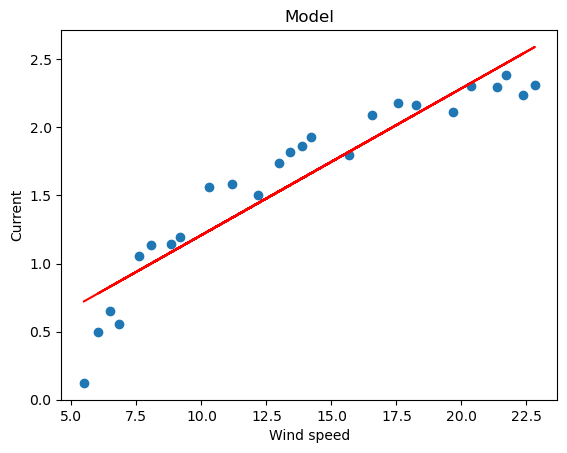

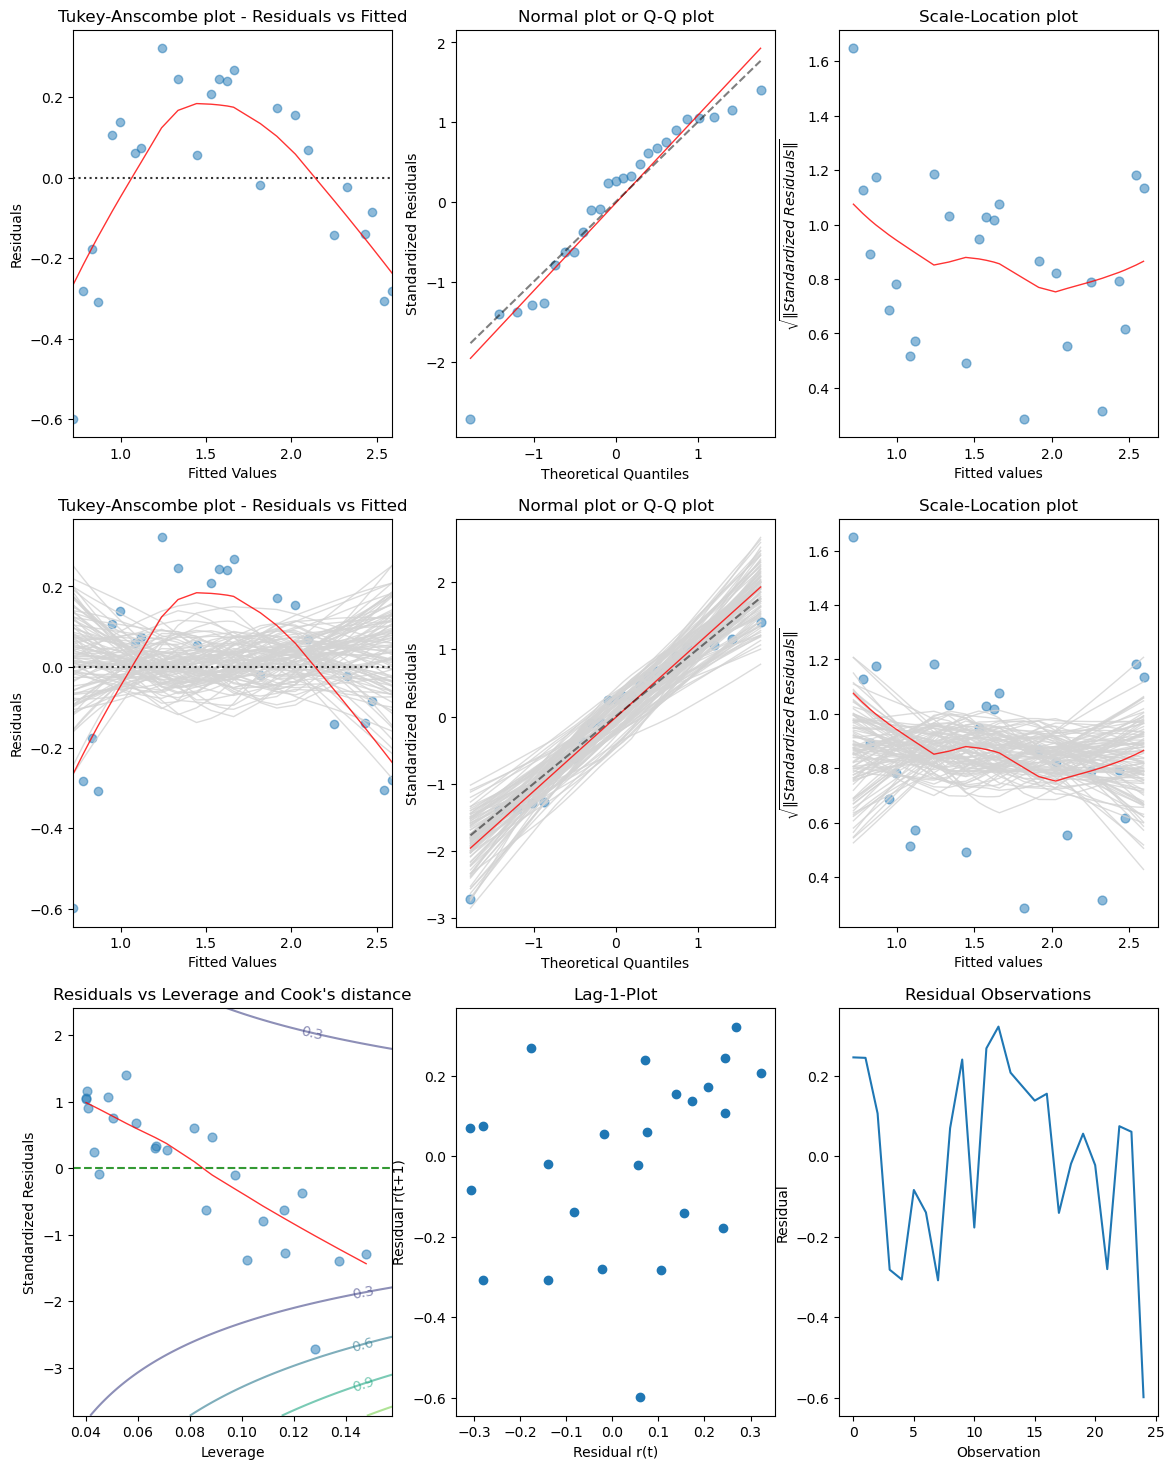

In [39]:
def naive_transform(z):
    return z

naive_y = naive_transform(windmill_df.current)
naive_x = windmill_df.wind_speed

naive_x_sm = sm.add_constant(naive_x)
naive_model = sm.OLS(naive_y, naive_x_sm).fit()

model_plot(naive_x, naive_y, naive_model, 'Wind speed', 'Current')
tma_plots(naive_model)

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ❌ The Tukey-Anscompe plot (upper-left) shows that the residuals are not equal to 0. If they were, the red line would be on the 0-axis and the red line would be contained within the grey smoothing lines.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (upper-right) tends to decrease, but it is contained within the grey band of simulated smoothing curves. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper-middle). We therefore interpret the error terms $\epsilon_i$ as normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ If we assume that the order of the data reflects their time of measurement we can plot a Lag-1-Plot of the residuals. There is no pattern in neither the Lag-1-Plot nor the Residual Observation plot. Therefore, we conclude that the error terms $\epsilon_i$ are independent.

**Conclusion:** At least one assumption of a linear regression model is violated. Therefore, the model is insufficient. We can try to transform the predictor variables to solve this problem.

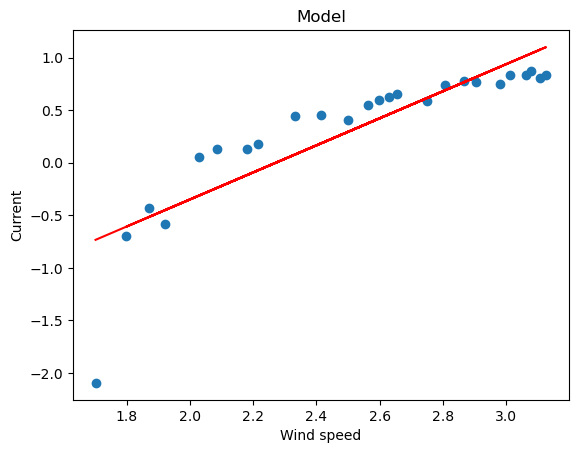

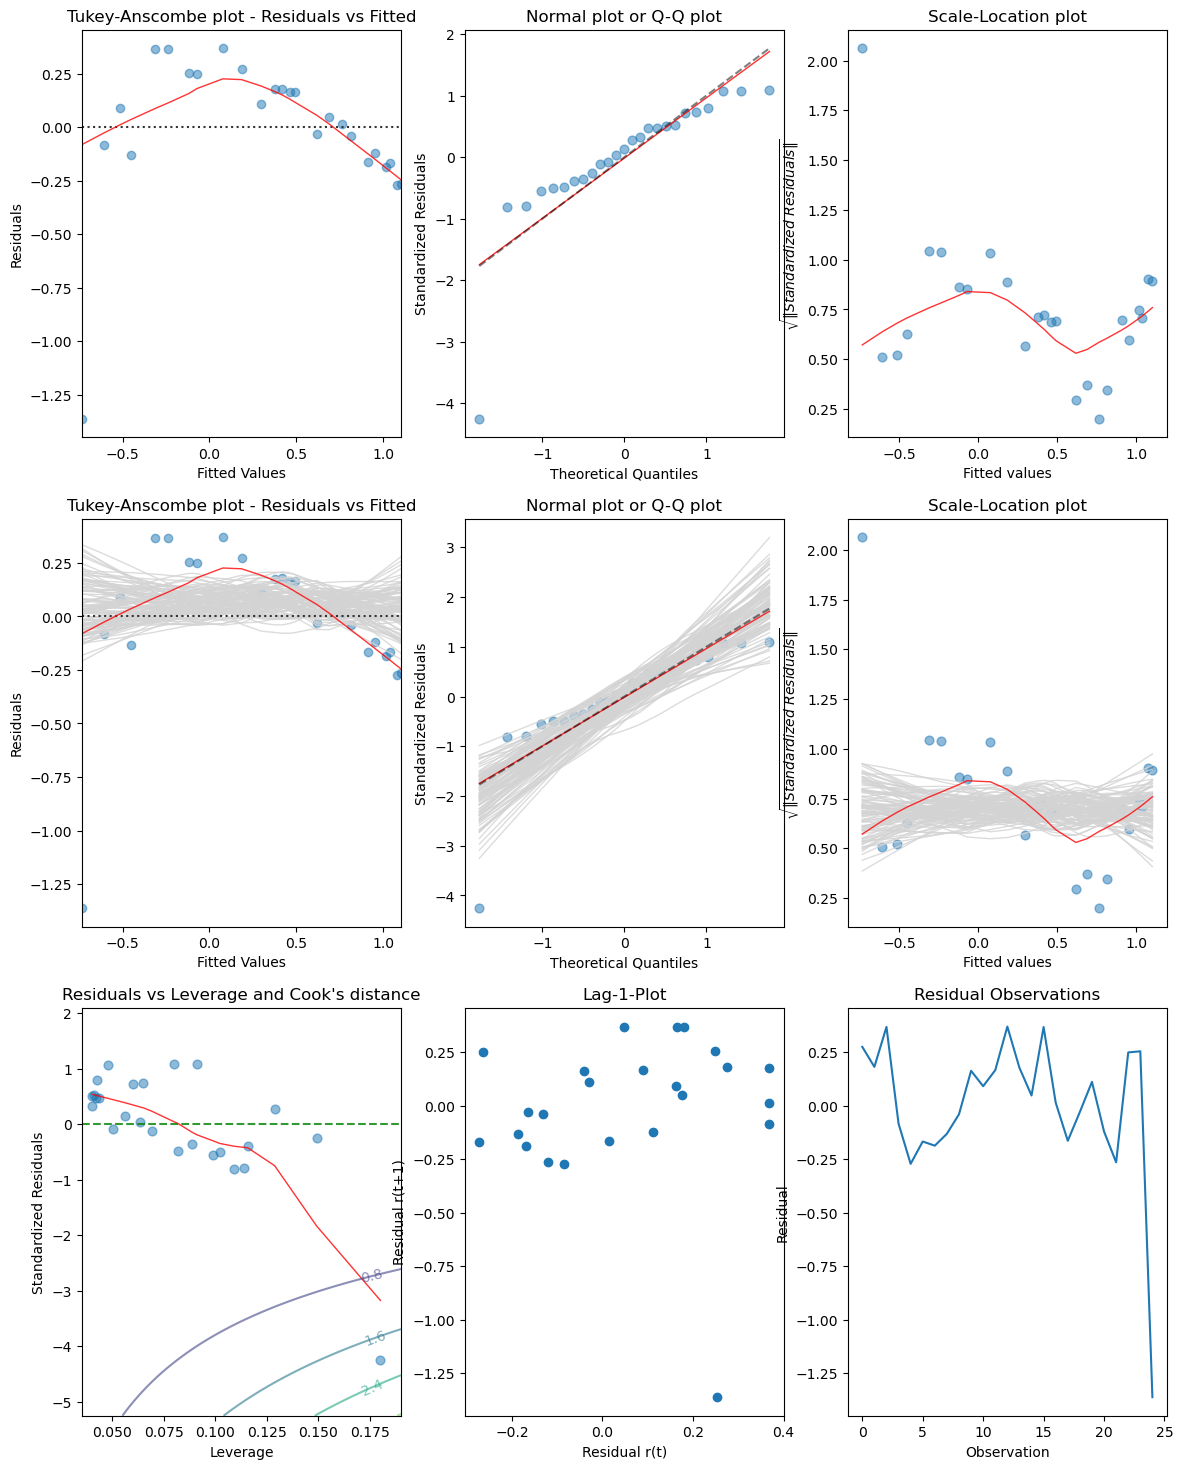

In [40]:
def first_aid_transform(z):
    return np.log(z)

first_aid_x = first_aid_transform(windmill_df.wind_speed)
first_aid_y = first_aid_transform(windmill_df.current)

first_aid_x_sm = sm.add_constant(first_aid_x)
first_aid_model = sm.OLS(first_aid_y, first_aid_x_sm).fit()

model_plot(first_aid_x, first_aid_y, first_aid_model, 'Wind speed', 'Current')
tma_plots(first_aid_model)

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ❌ The Tukey-Anscompe plot (upper-left) shows that the residuals are not equal to 0. If they were, the red line would be on the 0-axis and the red line would be fully contained by the simulated brey smoothing curves.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ❌ The Scale-Location Plot (upper-right) shows that the red curve tends to oscillate. In addition it is _not_ fully contained by the simulated gray smoothing curves. Therefore we can't conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ❌ The data points are _not_ contained in the grey band of the simulated curves in the Q-Q plot (upper middle). We therefore interpret the error terms $\epsilon_i$ as _not_ normally distributed.
4. The error terms $\epsilon_i$ are independent
    - We don't have time information in the data itself, therefore we no longer verify Lag-1-Plot and Residual Observations.

**Conclusion:** At least one assumption of a linear regression model is violated. Therefore, the model is insufficient. We can try to transform the predictor variables to solve this problem.

c) Expert Knowledge Transformation

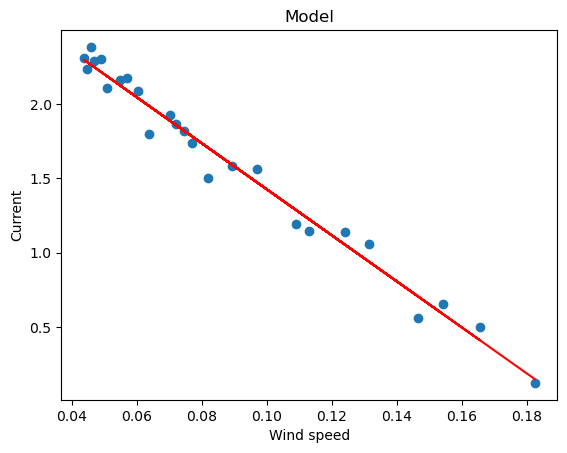

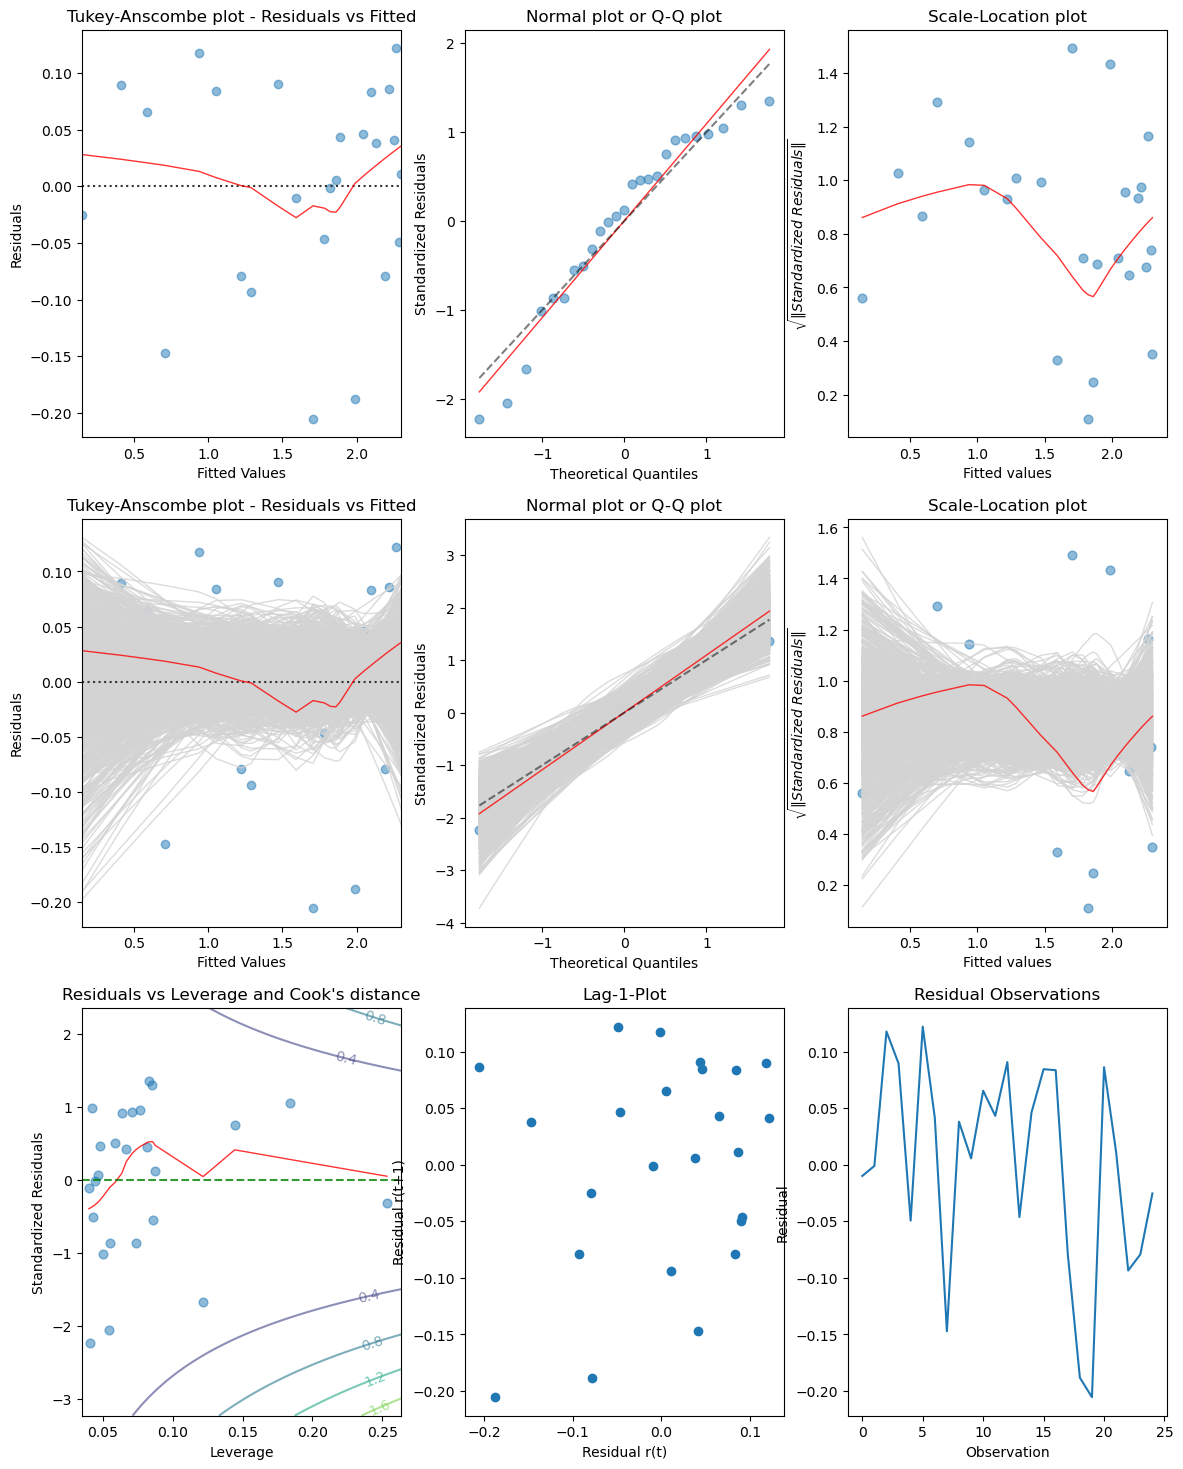

In [42]:
def expert_transform(z):
    return 1. / z

expert_x = expert_transform(windmill_df.wind_speed)
expert_y = windmill_df.current

expert_x_sm = sm.add_constant(expert_x)
expert_model = sm.OLS(expert_y, expert_x_sm).fit()

model_plot(expert_x, expert_y, expert_model, 'Wind speed', 'Current')
tma_plots(expert_model, n_samp=1000)

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are pretty close to 0 and the red line is contained by the simulated gray smoothing curves. We therefore conclude that $E[\epsilon_i] = 0$
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (upper-right) shows that the red line seems to oscillate - but it seems also to be contained within the simulated gray smoothing curves. Therefore, we conclude that the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper middle). We therefore conclude that the error terms $\epsilon_i$ are normally distributed.

**Conclusion:** No assumption of a linear regression model is violated. Therefore, this model is sufficient.

**Conclusion:** At least one assumption of a linear regression model is violated. Therefore, the model is insufficient. We can try to transform the predictor variables to solve this problem.# Exercise 2.2

In [45]:
forbes_df = pd.read_csv('../Data/Forbes.csv')
forbes_df

,y,pressure
0,194.5,20.79
1,194.3,20.79
2,197.9,22.40
3,198.4,22.67
4,199.4,23.15
5,199.9,23.35
6,200.9,23.89
7,201.1,23.99
8,201.4,24.02
9,201.3,24.01


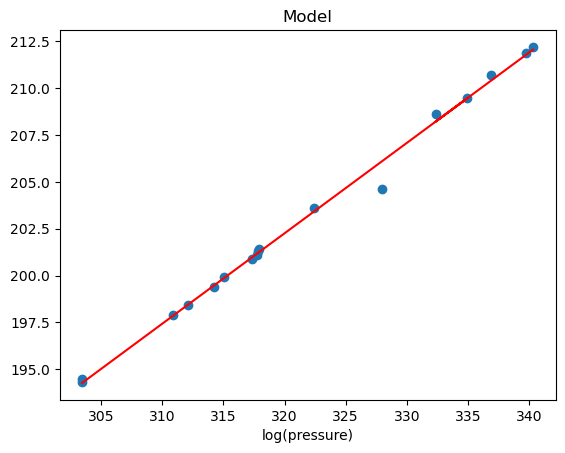

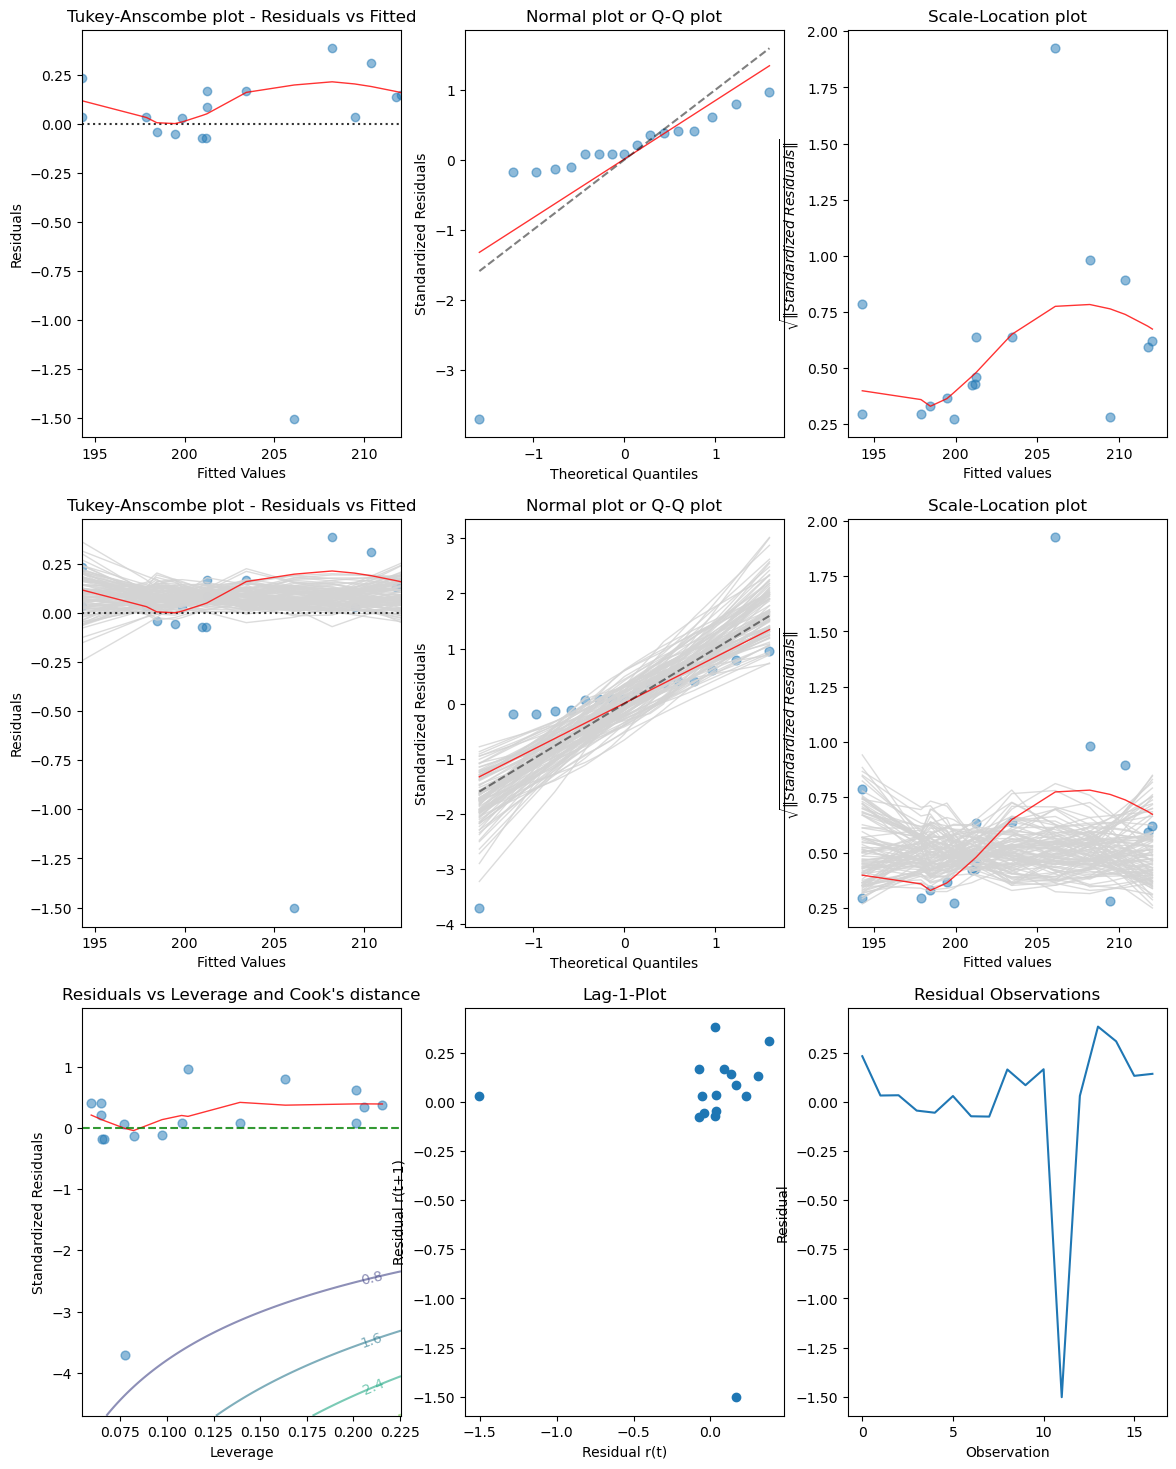

In [46]:
def forbes_transform(z):
    return 100 * np.log(z)

forbes_y = forbes_df.y
forbes_x = forbes_transform(forbes_df.pressure)

forbes_x_sm = sm.add_constant(forbes_x)
forbes_model = sm.OLS(forbes_y, forbes_x_sm).fit()

model_plot(forbes_x, forbes_y, forbes_model, 'log(pressure)')
tma_plots(forbes_model)

The assumptions of a linear regression are _not_ fulfilled because:

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are pretty close to 0 and they seem to be contained by the simulated gray smoothing curves.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ❌ The Scale-Location Plot (upper-right) shows that the red line is not a straight line and the grey smoothing curves don't fully contain it. There is _no_ evidence that the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ❌ Not all data points are contained in the grey band of the simulated curves in the Q-Q plot (upper middle). It seems the error terms $\epsilon_i$ are _not_ normally distributed.
4. The error terms $\epsilon_i$ are independent
    - We don't have time information in the data so we cannot say anything about the independence of the error terms.


# Exercise 2.3

In [47]:
gas_df = pd.read_csv('../Data/gas.csv')
gas_df

,temperature,consumption
0,10.3,69.81
1,11.4,82.75
2,11.5,81.75
3,12.5,80.38
4,13.1,85.89
5,13.4,75.32
6,13.6,69.81
7,15.0,78.54
8,15.2,81.29
9,15.3,99.20


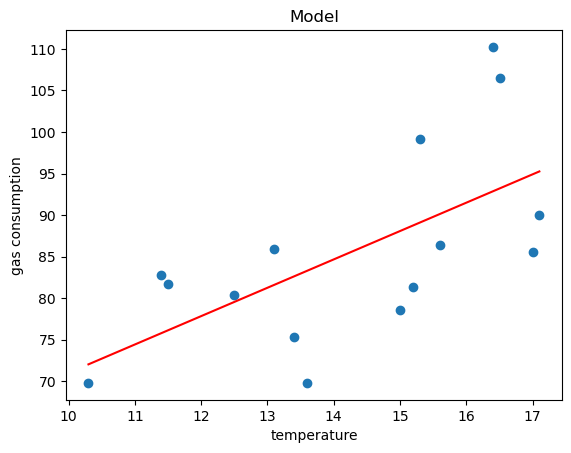

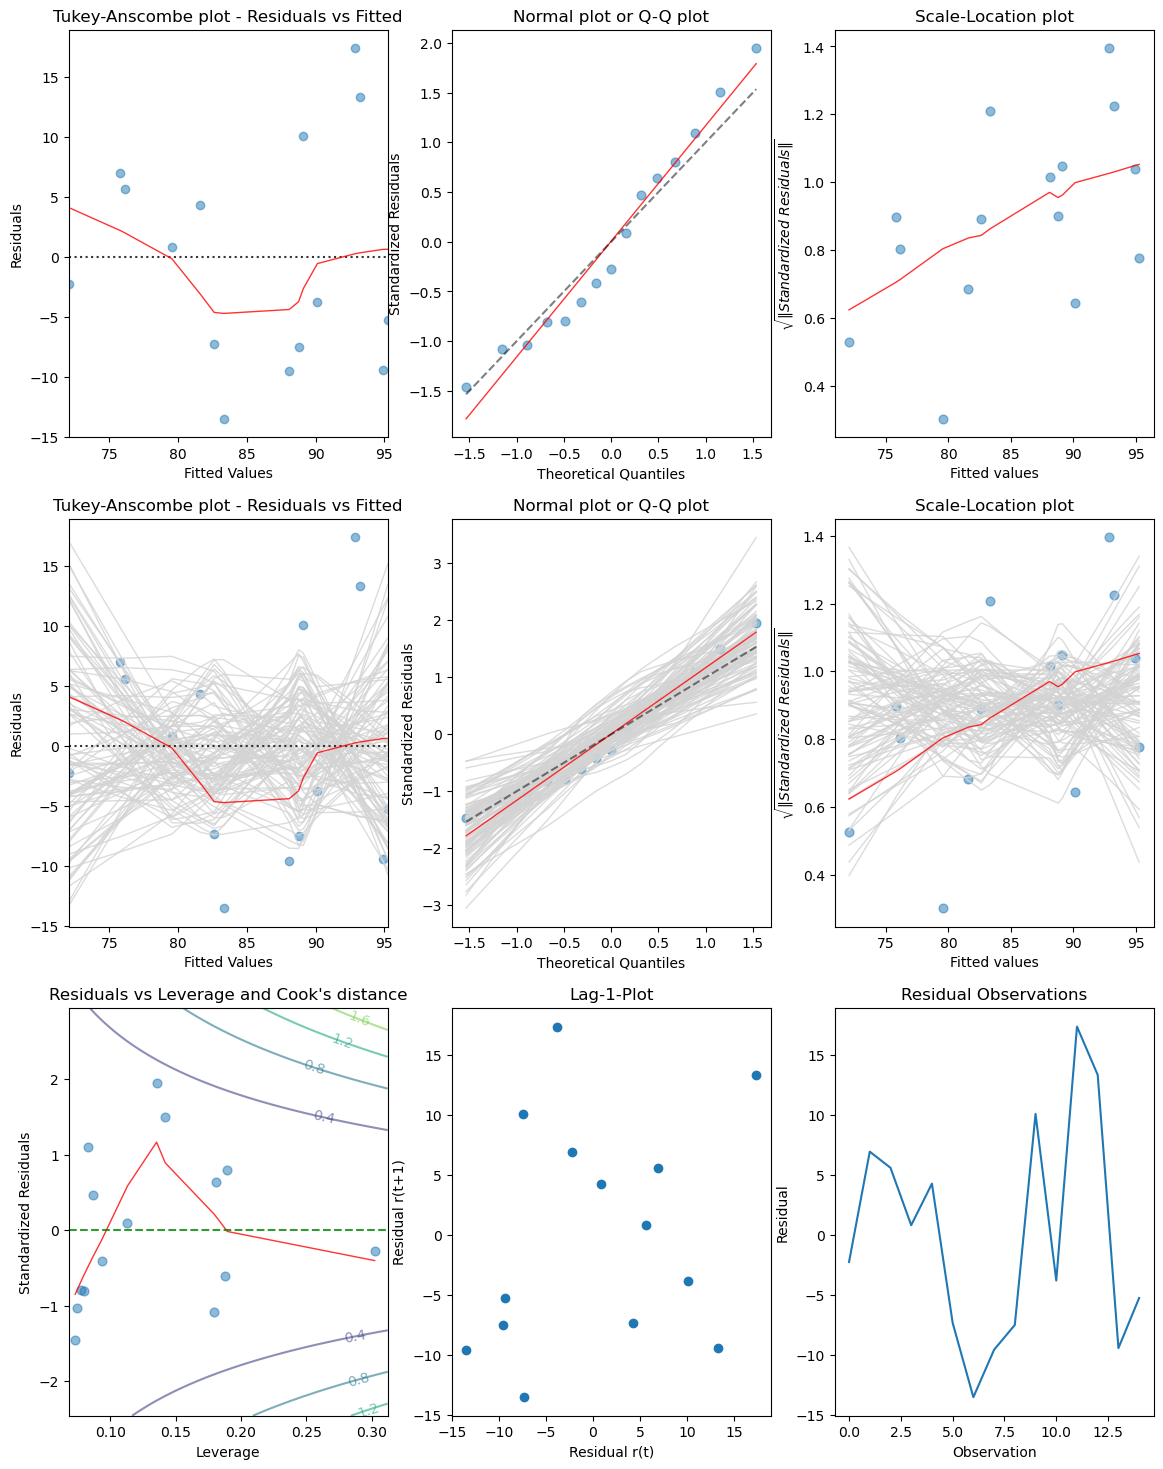

In [48]:
def transform_gas(z):
    return z

gas_x = transform_gas(gas_df.temperature)
gas_y = gas_df.consumption

gas_x_sm = sm.add_constant(gas_x)
gas_model = sm.OLS(gas_y, gas_x_sm).fit()

model_plot(gas_x, gas_y, gas_model, 'temperature', 'gas consumption')
tma_plots(gas_model)

The assumptions of a linear regression are _not_ fulfilled because:

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ❌ The Tukey-Anscompe plot (upper-left) shows that the residuals are not close to 0.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ❌ The Scale-Location Plot (middle-left) shows that the simulated smoothing curves systematically deviate from a straight line. We conclude that the variances of the error terms $\epsilon_i$ are not constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ All data points are contained in the grey band of the simulated curves in the Q-Q plot (upper right). It seems the error terms $\epsilon_i$ are normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ❌ There is at least some pattern in the Lag-1-Plot and the Residual Observation plot. Therefore, we conclude that the error terms $\epsilon_i$ are _not completely_ independent


In [49]:
antique_clocks_df = pd.read_csv('../Data/antique_clocks.csv')
antique_clocks_df

,Unnamed: 0,age,price
0,1,108,729
1,2,108,1055
2,3,111,785
3,4,111,1175
4,5,113,946
5,6,115,744
6,7,115,1080
7,8,117,1024
8,9,117,1152
9,10,126,1336


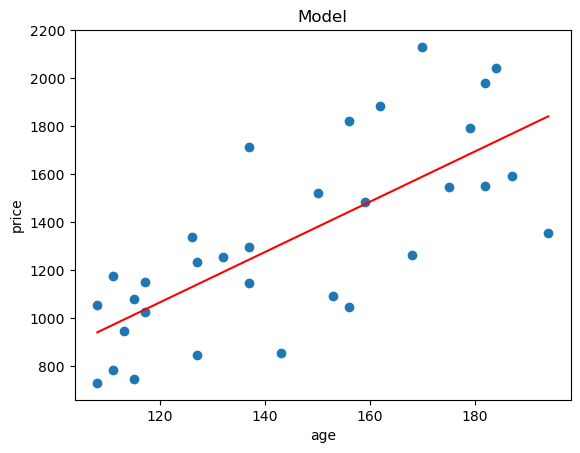

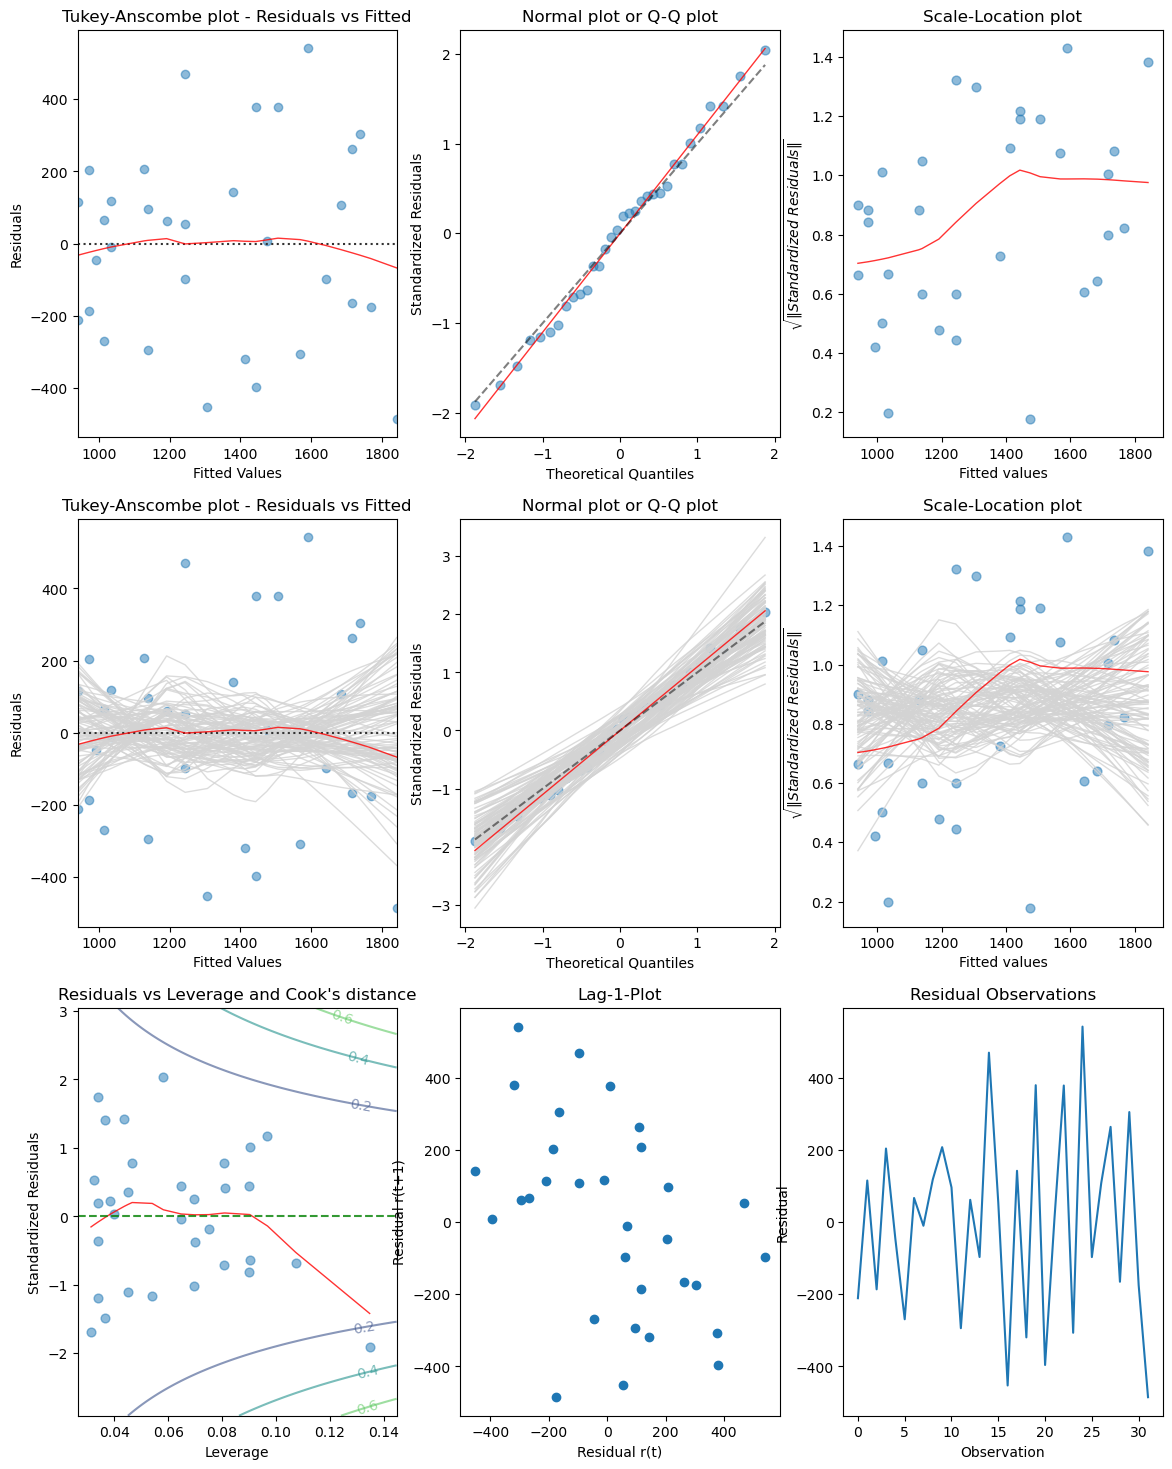

In [50]:
antique_clocks_x = antique_clocks_df.age
antique_clocks_y = antique_clocks_df.price

antique_clocks_x_sm = sm.add_constant(antique_clocks_x)
antique_clocks_model = sm.OLS(antique_clocks_y, antique_clocks_x_sm).fit()

model_plot(antique_clocks_x, antique_clocks_y, antique_clocks_model, 'age', 'price')
tma_plots(antique_clocks_model)

The assumptions of a linear regression are fulfilled because:

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are close to 0.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (middle-left) shows that the simulated smoothing curves do not systematically deviate from a straight line in the middle parts. We conclude that the variances of the error terms $\epsilon_i$ are constant for some parts of the data, but not for the other parts.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ All data points are contained in the grey band of the simulated curves in the Q-Q plot (upper right). It seems the error terms $\epsilon_i$ are normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ There is no pattern in the Lag-1-Plot and the Residual Observation plot. Therefore, we conclude that the error terms $\epsilon_i$ are independent
